In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, random


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from scipy import stats

sns.set(style="whitegrid")
%matplotlib inline

In [5]:
data_path = '/kaggle/input/momtsimdata/MoMTSim_20240722202413_1000_dataset.csv'
df = pd.read_csv(data_path)


In [3]:
# Display first few rows of the data
print("\nFirst 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,PAYMENT,579.16,4018807983755588,29.32,29.32,30-0000345,0.00,0.00,0
1,0,TRANSFER,39.03,4610593854752035,39.03,0.00,4944921135715488,55.94,94.98,1
2,0,TRANSFER,21.78,4840578447365454,21.78,0.00,4305579785620656,58.09,79.88,1
3,0,PAYMENT,570.22,4958066799829630,5.29,5.29,00-0000388,0.00,0.00,0
4,0,PAYMENT,574.80,4149196095918843,82.63,82.63,80-0005320,0.00,0.00,0


In [4]:
print("\nDataset Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())


print("\nStatistical Summary:")
display(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225958 entries, 0 to 4225957
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   transactionType  object 
 2   amount           float64
 3   initiator        int64  
 4   oldBalInitiator  float64
 5   newBalInitiator  float64
 6   recipient        object 
 7   oldBalRecipient  float64
 8   newBalRecipient  float64
 9   isFraud          int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 322.4+ MB

Missing values per column:
step               0
transactionType    0
amount             0
initiator          0
oldBalInitiator    0
newBalInitiator    0
recipient          0
oldBalRecipient    0
newBalRecipient    0
isFraud            0
dtype: int64

Statistical Summary:


,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06
mean,9.811771e+01,5.302139e+04,4.495008e+15,2.246055e+07,2.246527e+07,1.685005e+06,1.703967e+06,5.284288e-01
std,5.573710e+01,2.708194e+06,2.912521e+14,6.418504e+07,6.421561e+07,6.795783e+06,6.802160e+06,4.991912e-01
min,0.000000e+00,0.000000e+00,4.000000e+15,-1.999926e+05,-1.999926e+05,-7.477966e+04,0.000000e+00,0.000000e+00
25%,5.000000e+01,9.444000e+01,4.237994e+15,4.681000e+01,0.000000e+00,3.345156e+04,4.251237e+04,0.000000e+00
50%,9.900000e+01,5.966900e+02,4.491576e+15,3.655435e+03,0.000000e+00,2.007614e+05,2.042479e+05,1.000000e+00
75%,1.470000e+02,1.708469e+04,4.747260e+15,2.344082e+05,8.150306e+04,2.002134e+06,2.041814e+06,1.000000e+00
max,1.920000e+02,7.654805e+08,5.000000e+15,6.409231e+08,6.409231e+08,3.810134e+08,3.813883e+08,1.000000e+00


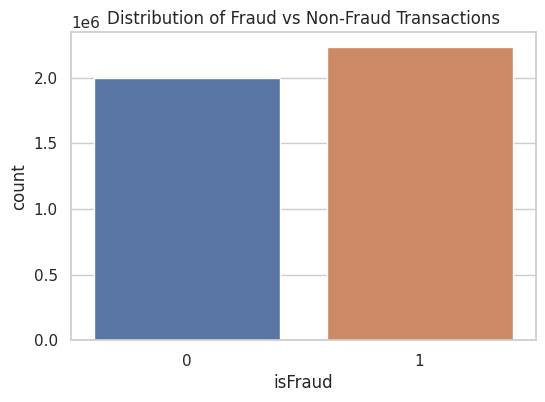

In [10]:
# Distribution of the target class ('isFraud')
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


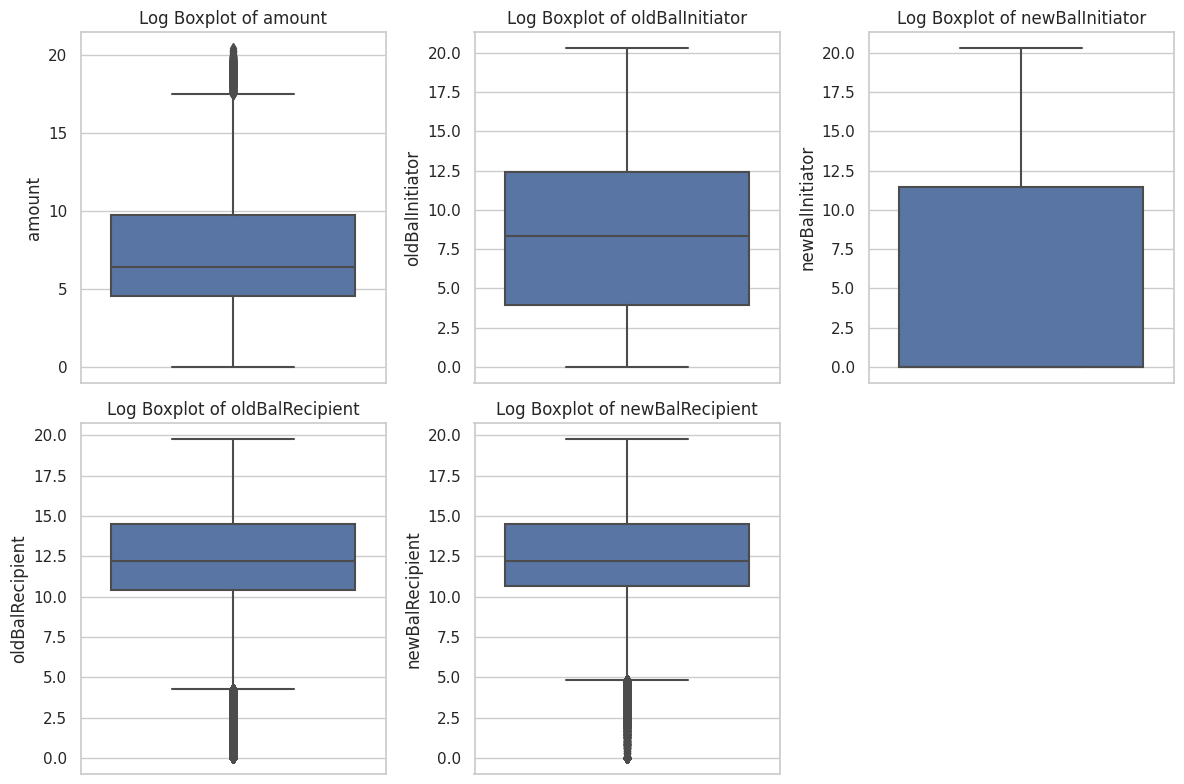

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['amount', 'oldBalInitiator', 'newBalInitiator', 'oldBalRecipient', 'newBalRecipient']

# Create log-transformed columns (log1p handles zero gracefully)
df_log = df.copy()
for col in num_features:
    df_log[col] = np.log1p(df[col])  # log(x+1)

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_log[col], showfliers=True)
    plt.title(f"Log Boxplot of {col}")
plt.tight_layout()
plt.show()


In [6]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"\nIQR method for 'amount': Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")


IQR method for 'amount': Lower Bound = -25390.935, Upper Bound = 42570.065


In [7]:
outliers_iqr = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print("Number of outliers in 'amount' using IQR method:", outliers_iqr.shape[0])

Number of outliers in 'amount' using IQR method: 370472


In [7]:
df['z_score_amount'] = np.abs(stats.zscore(df['amount']))
outliers_zscore = df[df['z_score_amount'] > 3]
print("Number of outliers in 'amount' using z-score method:", outliers_zscore.shape[0])

Number of outliers in 'amount' using z-score method: 876


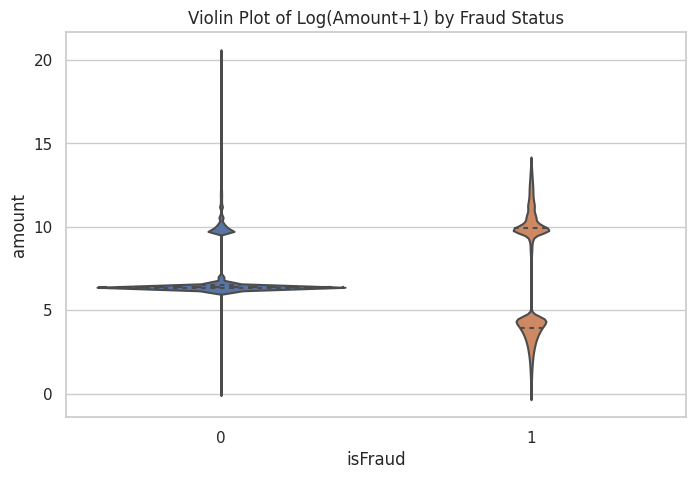

In [15]:
plt.figure(figsize=(8,5))
sns.violinplot(x='isFraud', y='amount', data=df_log, inner='quartile')
plt.title("Violin Plot of Log(Amount+1) by Fraud Status")
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


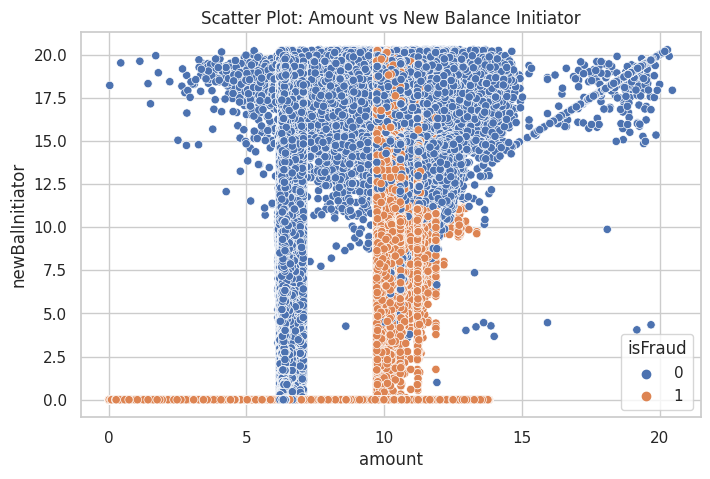

In [16]:
df_log = df.copy()
for col in num_features:
    df_log[col] = np.log1p(df[col])  

plt.figure(figsize=(8,5))
sns.scatterplot(x='amount', y='newBalInitiator', hue='isFraud', data=df_log)
plt.title("Scatter Plot: Amount vs New Balance Initiator")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

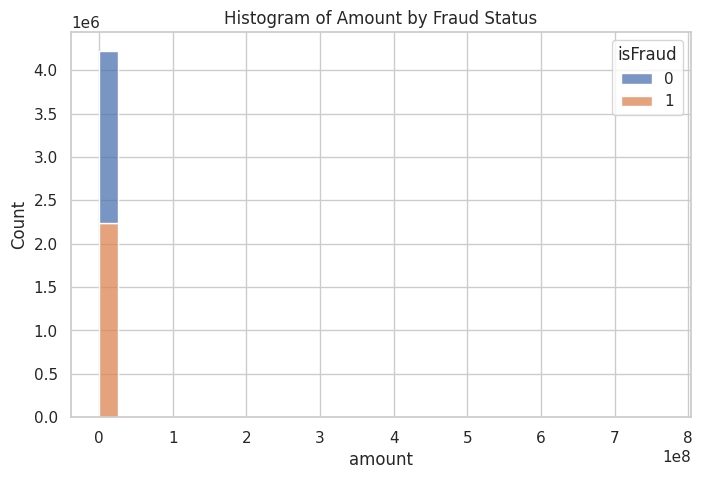

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='amount', hue='isFraud', multiple='stack', bins=30)
plt.title("Histogram of Amount by Fraud Status")
plt.show()

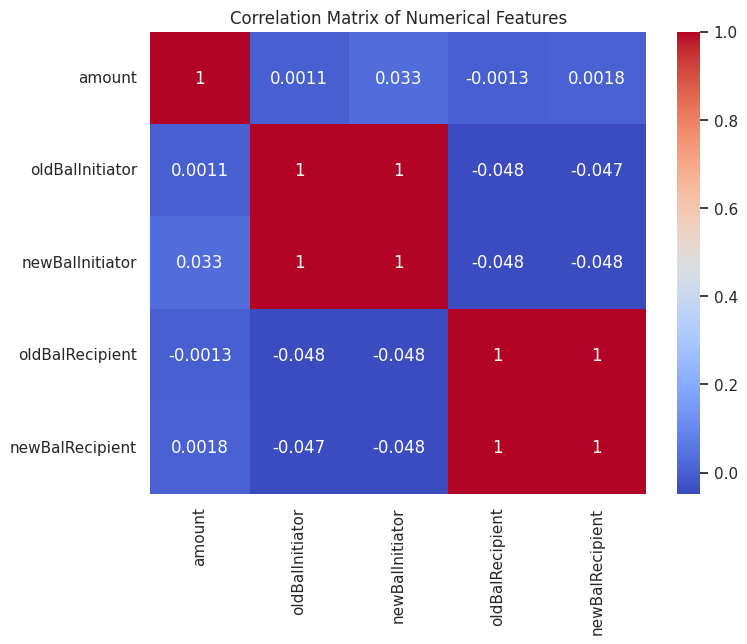

In [18]:
plt.figure(figsize=(8,6))
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [8]:
# Randomly sample 20,000 rows from the original DataFrame
df_sampled = df.sample(n=20000, random_state=42)

# Encode 'transactionType' into a numeric form
df_sampled['transactionType_encoded'] = df_sampled['transactionType'].astype('category').cat.codes

features = ['amount', 'oldBalInitiator', 'newBalInitiator', 'oldBalRecipient', 'newBalRecipient']

# Apply Min-Max scaling on the features
df_minmax = df_sampled.copy()
minmax_scaler = MinMaxScaler()
df_minmax[features] = minmax_scaler.fit_transform(df_minmax[features])

# Apply Standard scaling on the features (if needed, here kept for comparison)
df_zscore = df_sampled.copy()
std_scaler = StandardScaler()
df_zscore[features] = std_scaler.fit_transform(df_zscore[features])

# For further processing, we can continue with the minmax-scaled DataFrame
df_processed = df_minmax.copy()

# Check correlation with the target variable 'isFraud'
numeric_df = df_processed.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

print("\nCorrelation with target 'isFraud':")
print(corr_matrix['isFraud'].sort_values(ascending=False))

selected_features = ['transactionType_encoded', 'amount', 'newBalInitiator', 'oldBalInitiator',
                     'newBalRecipient', 'oldBalRecipient']

X = df_processed[selected_features]
y = df_processed['isFraud']

# Split the 20,000-sample dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes after Splitting:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Correlation with target 'isFraud':
isFraud                    1.000000
transactionType_encoded    0.818728
newBalRecipient            0.080466
oldBalRecipient            0.078896
initiator                  0.007543
amount                    -0.012093
step                      -0.024174
oldBalInitiator           -0.282711
newBalInitiator           -0.283393
Name: isFraud, dtype: float64

Shapes after Splitting:
X_train: (16000, 6)
X_test: (4000, 6)
y_train: (16000,)
y_test: (4000,)


In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
print("=== Bagging Ensemble: K-Nearest Neighbors (KNN) ===")
knn_results = []
metrics = ['euclidean', 'manhattan', 'minkowski']
k_values = [3, 5, 7]
for metric in metrics:
    for k in k_values:
        base_knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        bagging_knn = BaggingClassifier(base_estimator=base_knn, n_estimators=10, max_samples=0.8, random_state=42)
        bagging_knn.fit(X_train, y_train)
        y_pred = bagging_knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"KNN (metric={metric}, k={k}): Accuracy = {acc:.4f}")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        knn_results.append((metric, k, acc))

=== Bagging Ensemble: K-Nearest Neighbors (KNN) ===


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN (metric=euclidean, k=3): Accuracy = 0.9619
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    398544
           1       0.97      0.96      0.96    446648

    accuracy                           0.96    845192
   macro avg       0.96      0.96      0.96    845192
weighted avg       0.96      0.96      0.96    845192

[[385310  13234]
 [ 18951 427697]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN (metric=euclidean, k=5): Accuracy = 0.9640
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    398544
           1       0.97      0.96      0.97    446648

    accuracy                           0.96    845192
   macro avg       0.96      0.96      0.96    845192
weighted avg       0.96      0.96      0.96    845192

[[387484  11060]
 [ 19394 427254]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN (metric=euclidean, k=7): Accuracy = 0.9652
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    398544
           1       0.98      0.96      0.97    446648

    accuracy                           0.97    845192
   macro avg       0.96      0.97      0.97    845192
weighted avg       0.97      0.97      0.97    845192

[[388951   9593]
 [ 19846 426802]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN (metric=manhattan, k=3): Accuracy = 0.9619
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    398544
           1       0.97      0.96      0.96    446648

    accuracy                           0.96    845192
   macro avg       0.96      0.96      0.96    845192
weighted avg       0.96      0.96      0.96    845192

[[385321  13223]
 [ 18968 427680]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN (metric=manhattan, k=5): Accuracy = 0.9639
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    398544
           1       0.97      0.96      0.97    446648

    accuracy                           0.96    845192
   macro avg       0.96      0.96      0.96    845192
weighted avg       0.96      0.96      0.96    845192

[[387492  11052]
 [ 19440 427208]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN (metric=manhattan, k=7): Accuracy = 0.9652
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    398544
           1       0.98      0.96      0.97    446648

    accuracy                           0.97    845192
   macro avg       0.96      0.97      0.97    845192
weighted avg       0.97      0.97      0.97    845192

[[389004   9540]
 [ 19902 426746]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN (metric=minkowski, k=3): Accuracy = 0.9619
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    398544
           1       0.97      0.96      0.96    446648

    accuracy                           0.96    845192
   macro avg       0.96      0.96      0.96    845192
weighted avg       0.96      0.96      0.96    845192

[[385310  13234]
 [ 18951 427697]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN (metric=minkowski, k=5): Accuracy = 0.9640
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    398544
           1       0.97      0.96      0.97    446648

    accuracy                           0.96    845192
   macro avg       0.96      0.96      0.96    845192
weighted avg       0.96      0.96      0.96    845192

[[387484  11060]
 [ 19394 427254]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNN (metric=minkowski, k=7): Accuracy = 0.9652
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    398544
           1       0.98      0.96      0.97    446648

    accuracy                           0.97    845192
   macro avg       0.96      0.97      0.97    845192
weighted avg       0.97      0.97      0.97    845192

[[388951   9593]
 [ 19846 426802]]


In [10]:
print("\n=== Bagging Ensemble: Support Vector Machine (SVM) ===")
svm_kernels = ['linear', 'rbf', 'poly']
for kernel in svm_kernels:
    base_svm = SVC(kernel=kernel, C=1.0, random_state=42)
    bagging_svm = BaggingClassifier(base_estimator=base_svm, n_estimators=10, max_samples=0.8, random_state=42)
    bagging_svm.fit(X_train, y_train)
    y_pred = bagging_svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"SVM (kernel={kernel}, C=1.0): Accuracy = {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


=== Bagging Ensemble: Support Vector Machine (SVM) ===


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SVM (kernel=linear, C=1.0): Accuracy = 0.9493
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1855
           1       0.94      0.97      0.95      2145

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

[[1712  143]
 [  60 2085]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SVM (kernel=rbf, C=1.0): Accuracy = 0.9545
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1855
           1       0.94      0.97      0.96      2145

    accuracy                           0.95      4000
   macro avg       0.96      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

[[1728  127]
 [  55 2090]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SVM (kernel=poly, C=1.0): Accuracy = 0.9525
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1855
           1       0.94      0.97      0.96      2145

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

[[1727  128]
 [  62 2083]]



=== Bagging Ensemble: Decision Trees ===
Decision Trees Ensemble: Accuracy = 0.9710
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1855
           1       0.99      0.96      0.97      2145

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

[[1830   25]
 [  91 2054]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


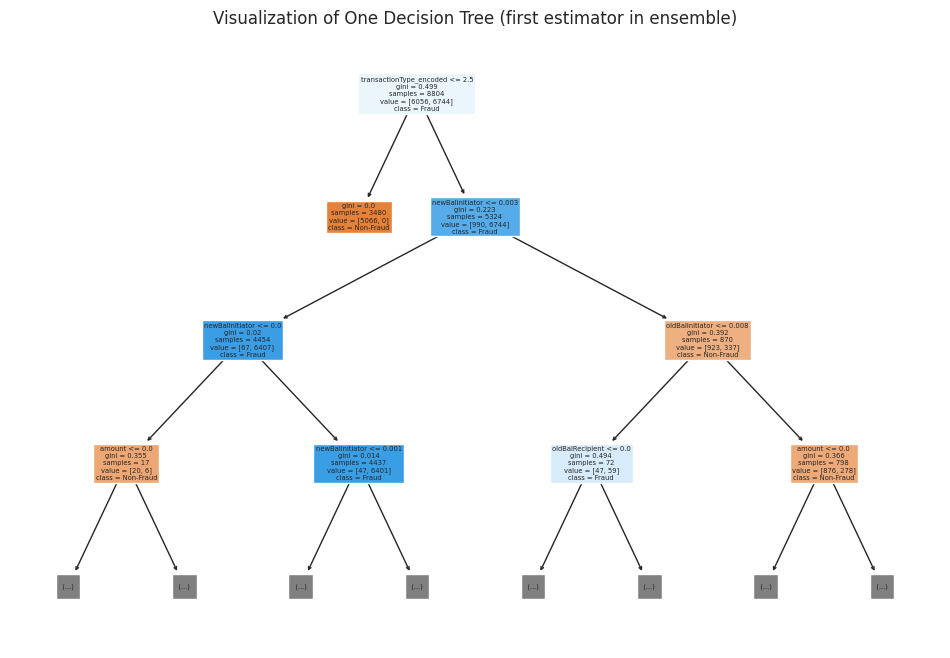

In [11]:
print("\n=== Bagging Ensemble: Decision Trees ===")
base_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
bagging_tree = BaggingClassifier(base_estimator=base_tree, n_estimators=10, max_samples=0.8, random_state=42)
bagging_tree.fit(X_train, y_train)
y_pred_tree = bagging_tree.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred_tree)
print(f"Decision Trees Ensemble: Accuracy = {tree_acc:.4f}")
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))

plt.figure(figsize=(12,8))
plot_tree(bagging_tree.estimators_[0], feature_names=selected_features, class_names=['Non-Fraud','Fraud'], filled=True, max_depth=3)
plt.title("Visualization of One Decision Tree (first estimator in ensemble)")
plt.show()


In [12]:
print("\n=== Bagging Ensemble: Logistic Regression ===")
for penalty in ['l1', 'l2']:
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    base_logreg = LogisticRegression(penalty=penalty, solver=solver, max_iter=1000, random_state=42)
    bagging_logreg = BaggingClassifier(base_estimator=base_logreg, n_estimators=10, max_samples=0.8, random_state=42)
    bagging_logreg.fit(X_train, y_train)
    y_pred_logreg = bagging_logreg.predict(X_test)
    acc = accuracy_score(y_test, y_pred_logreg)
    print(f"Logistic Regression (penalty={penalty}): Accuracy = {acc:.4f}")
    print(classification_report(y_test, y_pred_logreg))
    print(confusion_matrix(y_test, y_pred_logreg))









=== Bagging Ensemble: Logistic Regression ===


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Logistic Regression (penalty=l1): Accuracy = 0.9463
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1855
           1       0.93      0.98      0.95      2145

    accuracy                           0.95      4000
   macro avg       0.95      0.94      0.95      4000
weighted avg       0.95      0.95      0.95      4000

[[1685  170]
 [  45 2100]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Logistic Regression (penalty=l2): Accuracy = 0.9447
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1855
           1       0.92      0.98      0.95      2145

    accuracy                           0.94      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.95      0.94      0.94      4000

[[1677  178]
 [  43 2102]]
